# Распознавание рукописных цифр MNIST

## Подготовка данных

In [1]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображений
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image # Отрисовка изображений

2023-03-27 21:04:54.071203: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() # Загружаю данные MNIST

In [3]:
x_train_org.shape # Проверка

(60000, 28, 28)

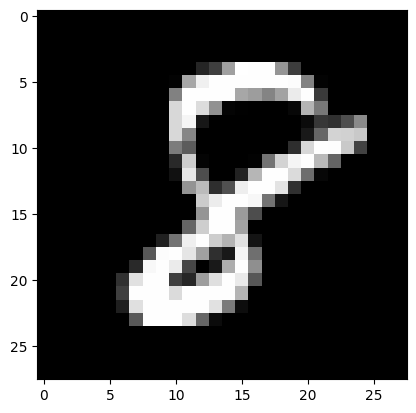

In [4]:
n = 146 # Номер картинки
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB')) # Отрисовка картинки
plt.show() # Вывод картинки 

In [5]:
# Меняю формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
# Нормализую входные данные
x_train = x_train.astype('float32') # Преобразовываю в тип float
x_train = x_train / 255 # Делю на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # Преобразовываю в тип float 
x_test = x_test / 255 # Делю на 255, чтобы диапазон был от 0 до 1

In [7]:
# Преобразую ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [8]:
print(y_train[0]) # Вывожу нормированный и преобразованный пример

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создание нейронной сети

In [9]:
model = Sequential() # Создаю сеть прямого распространения
model.add(Dense(800, input_dim = 784, activation = 'relu')) # Добавляю полносвязный слой на 800 нейронов с RELU-активацией
model.add(Dense(400, activation = 'relu')) # Добавляю полносвязный слой на 400 нейронов с RELU-активацией
model.add(Dense(10, activation = 'softmax')) # Добавляю полносвязный слой на 10 нейронов с softmax-активацией

2023-03-27 21:05:00.140488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy']) # Компилируею модель
print(model.summary()) # Вывожу структуру модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.fit(x_train, y_train, batch_size = 128, epochs = 15, verbose = 1)

Epoch 1/15
469/469 [==============================] - 5s 9ms/step - loss: 0.2057 - accuracy: 0.9385
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0763 - accuracy: 0.9763
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0475 - accuracy: 0.9847
Epoch 4/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0341 - accuracy: 0.9892
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0259 - accuracy: 0.9917
Epoch 6/15
469/469 [==============================] - 4s 10ms/step - loss: 0.0210 - accuracy: 0.9930
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0206 - accuracy: 0.9930
Epoch 8/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 9/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 10/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0133 - accuracy:

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

## Распознавание рукописных цифр

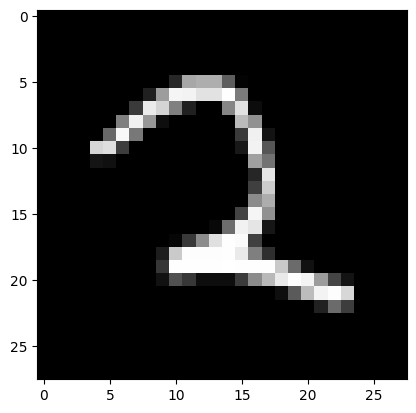

In [13]:
img = 387 # Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[img]).convert('RGBA')) # Отображаю картинку из тестового набора 
plt.show()

In [16]:
# Выбираю нужную картинку из тестовой выборки
testImg = x_test[img]
print(testImg.shape)

(784,)


In [17]:
# Добавляю одну размерность в конце, чтобы нейросеть могла распознать пример
# Поскольку нейросеть принимает массив примеров для распознавания
# Делаю массив из одного примера
testImg = np.expand_dims(testImg, axis = 0)
print(testImg.shape)

(1, 784)


In [18]:
prediction = model.predict(testImg) # Распознаем пример

1/1 [==============================] - 0s 80ms/step


In [19]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (итоговая цифра, которую распознала нейросеть)
print(pred)

2


In [21]:
print(y_test_org[img]) # Выводим правильный ответ, для сравнения

2
